# Data Mining

<br/>
<br/>

Dieses Notebook finden Sie hier: https://scm.cms.hu-berlin.de/ibi/python/-/blob/master/programmierspass/Data_Mining.ipynb

<br/>

![CC-BY-NC](https://scm.cms.hu-berlin.de/ibi/python/-/raw/master/img/cc-by-nc.png)

Dieses Notebook ist als freies Werk unter der Lizenz [Creative Commons Attribution-NonCommercial 3.0 Unported](http://creativecommons.org/licenses/by-nc/3.0/) verfügbar. Sie dürfen die Inhalte kopieren, verteilen und verändern, solange Sie die Urheber nennen und sie nicht für kommerzielle Zwecke nutzen.

## Was ist es und worum geht es?

**Data Mining** wird wie folgt definiert:
- **Definition 1 (Synonym zu *Knowledge Discovery in Databases (KDD)*)**: Prozess der (semi-) automatischen Extraktion von Wissen aus Datenbanken, das statistisch gültig, bisher unbekannt und potentiell nützlich ist. [1]
- **Definition 2 (Teil des KDD)**: 
    - Mustergewinnung/Modellierung
    - Interpretation
    - Anwendung von Algorithmen, die unter gewissen Ressourcenbeschränkungen Muster/Modelle bei gegebener Faktenmenge erzeugen

**Anwendungsfälle**
- Spamfilterung
- Objekterkennung auf Bildern
- Prüfung der Kreditwürdigkeit von potentiellen Kunden
- Personalisierte Empfehlungen (zum Beispiel auf YouTube und Spotify)


## Ziel für heute
- kurze Einführung in das Thema
- Anwendungsbeispiele zeigen
- Teaser für die Master-Lehrveranstaltungen *Knowledge Discovery in Databases (KDD)* und *Web Science*
- Inspiration :)

## Prozess-Model des Data Mining [1]
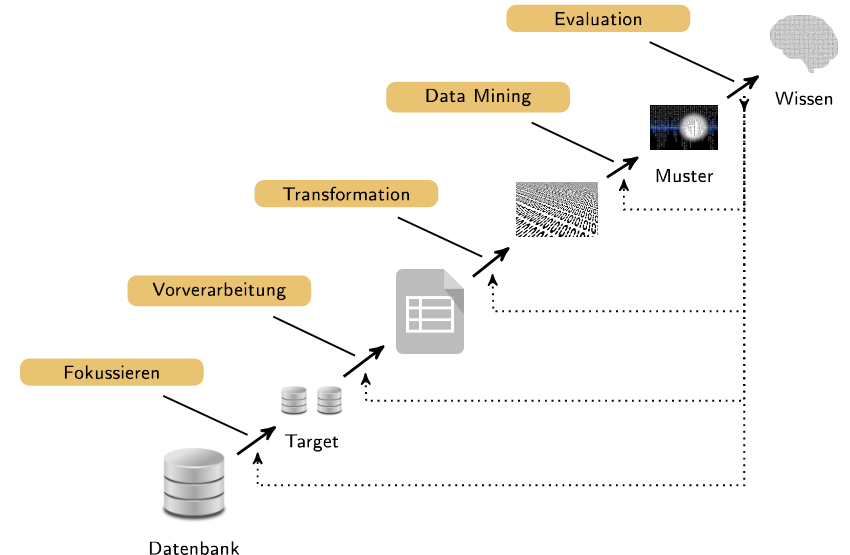


**Referenzen**

[1]: (Fayyad, Piatetsky-Shapiro und Smyth 1996) https://ojs.aaai.org//index.php/aimagazine/article/view/1230


### Data Mining Tasks
- **Clustering**
- **Klassifikation**
- Regression
- Assoziationsregeln
- ...

## Python Bibliotheken die wir heute benutzen:
- [Pandas](https://pandas.pydata.org/) für die **Vorverarbeitung**
- [Seaborn](https://seaborn.pydata.org/) und [Matplotlib](https://matplotlib.org/) zur **Visualisierung**
- [Scikit Learn](https://scikit-learn.org/stable/) zur **Implementierung von Algorithmen** und deren **Evaluation**


In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt



## Wie entscheide ich mich für ein Modell?

Abgeleitet vom Ziel der Data Mining Anwendung, wird ein Modell auf Basis des jeweiligen Tasks (Klassifikation, Clustering, Regression, Assoziationsregeln, ...) gewählt. Es gibt eine Vielzahl von Modellen. Eine erste Heuristik zur Entscheidung für angemessene Modelle zum experimentieren bietet [SciKit Learn's Machine Learning Map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html). Allerdings, hat auch die Bibliothek von SciKit Learn seine Grenzen. Assoziationsregeln sind hier nicht implementiert und auch komplexere Ansätze die auf Neuronalen Netzen basieren, werden üblicherweise mit anderen Bibliotheken implementiert wie bspw. [PyTorch](https://pytorch.org/), [Tensorflow](https://www.tensorflow.org/) oder [Keras](https://keras.io/). Ein paar Beispiele die typischerweise verwendet werden in den jeweiligen Tasks:

**Clustering**
- K-Means
- DBSCAN

**Klassifikation**
- Naive Bayes Klassifikator
- Decision Trees
- Random Forests
- Support Vector Machines
- Neural Networks (bspw. Convolutional Neural Networks, Transformers)

**Regression**
- SGD Regressor
- RidgeRegression

**Assoziationsregeln**
- Apriori Algorithm
- Eclat



# Clustering

Welche Ähnlichkeitsstrukturen liegen in den Daten vor?

Beispiele:
- Welche Gruppen von Kunden sind in der Datenbank?
- Welche Genre sind in der Musiklandschaft vorhanden?


### Exploration

In [ ]:
df = sns.load_dataset('titanic')
df.head()





# Preprocessing: Columns to keep:
- survived/alive --> binary
- pclass & class zusammen --> ordinary
- sex/who --> binary
- age --> int/float
- parch--> 
- fare --> float
- embarked --> class
- adult_male --> binary
- deck --> class
- embark_town --> class
- alone --> binary

In [ ]:
df["survived"]
df["alive"] = df["alive"].apply(lambda x: 1 if x == "yes" else 0)

In [ ]:
df = df.drop(["alive", "who", "deck"], axis=1)


# Spalten kodieren
- sklearn Encodern
- Pandas encoding

In [ ]:
df

In [ ]:
# Spalten zum ordinal kodieren
ordinal_cols = ["sex", "pclass", "adult_male", "alone"]
                
                # OneHotEncoding Columns
onehot_cols = ["embarked"]



In [ ]:
df[ordinal_cols]

# Ordinales Encoden

In [ ]:
from sklearn.preprocessing import OrdinalEncoder


# reduce dataframe to cols to encode ordinally
df_ord = df[ordinal_cols]

enc = OrdinalEncoder()

# tell the encoder how to encode
enc.fit(df_ord)

enc.categories_

# transform the dataframe
X_ord = enc.transform(df_ord)


In [ ]:
df[onehot_cols]

In [ ]:
from sklearn.preprocessing import OneHotEncoder


# reduce dataframe to cols to encode ordinally
df_onehot = df[onehot_cols]

enc = OneHotEncoder(handle_unknown='ignore')

# tell the encoder how to encode
enc.fit(df_onehot)

enc.categories_

# transform the dataframe
X_onehot = enc.transform(df_onehot)



# Numpy Package importieren

In [ ]:
import numpy as np



## Matrizen zusammenhängen

In [ ]:
X = np.concatenate((X_ord, X_onehot.todense()), axis=1)

X_onehot.shape

# Label absplitten

In [ ]:
X
y = df.survived.values

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = np.array(X_train) 
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


# Modelle trainieren

## Naive Bayes Estimator

In [ ]:
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()

# Modell Training
gnb.fit(X_train, y_train)

# Vorhersagen Trainingsset
y_pred = gnb.predict(X_test)



In [ ]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_test, y_pred=y_pred)

## K-Nearest Neighbors

In [ ]:
X_ord[:20]

In [ ]:
df.deck.value_counts()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# feature extraction
X = df.drop('species', axis=1)

# model initialization
kmeans = KMeans(n_clusters=3)

# training
kmeans.fit(X)

# 
y_pred = kmeans.predict(X)

# assign predictions
df['predicted'] = y_pred


In [ ]:
# Ergebnisse plotten
sns.scatterplot(data=df, x='sepal_length', y='petal_width', hue='predicted', style='species')
plt.title('Clusters based on KMeans')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np


# init DBSCAN 
dbscan = DBSCAN(eps=1, min_samples=2)

# train and predict DBSCAN
y_pred2 = dbscan.fit_predict(X)

# 
df["predict2"] = y_pred


sns.scatterplot(data=df, x='sepal_length', y='petal_width', hue='predict2', style='species')

plt.title('Clusters based on DBSCAN')
plt.show()


## Klassifikation

Beispiele:
- Objekt-Klassifizierung
- Kreditwürdigkeitsprüfung



### Exploration

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

df = sns.load_dataset('iris')
X = df.drop('species', axis=1)
y = df['species']

# train and test set split with a test set size of 50%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# initialize Naive Bayes Classifier
gnb = GaussianNB()

# training
gnb.fit(X_train, y_train)

# predict
gnb.predict(X_test)

# Evaluation
gnb.score(X_test, y_test)

<div class="alert alert-info">
Wir haben hier *nur* die Accuracy berechnet. Generell gibt es noch weitere Metriken die zur Evaluation von Klassifikationsverfahren verwendet werden können. Beispielsweise: **Precision, Recall und F1 Score.**
</div>


## Klassifikation auf Textdaten

### Exploration

### Vorverarbeitung

### Training

### Evaluation